In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [6]:
Company=pd.read_csv('Company_Data.csv')

In [7]:
Company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [8]:
le=preprocessing.LabelEncoder()

In [11]:
Company['ShelveLoc']=le.fit_transform(Company['ShelveLoc'])
Company['Urban']=le.fit_transform(Company['Urban'])
Company['US']=le.fit_transform(Company['US'])
Company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [28]:
Company.ShelveLoc.unique()

array([0, 1, 2], dtype=int64)

In [31]:
Company.ShelveLoc.value_counts()

ShelveLoc
2    219
0     96
1     85
Name: count, dtype: int64

In [24]:
x=Company.iloc[:,0:6]
y=Company.ShelveLoc

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=40)

# Building Decision Tree Classifier using Entropy Criteria

In [26]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[0] <= 6.165\nentropy = 1.462\nsamples = 320\nvalue = [83, 67, 170]'),
 Text(0.25, 0.625, 'x[0] <= 3.33\nentropy = 1.0\nsamples = 108\nvalue = [55, 0, 53]'),
 Text(0.125, 0.375, 'x[4] <= 349.5\nentropy = 0.503\nsamples = 18\nvalue = [16, 0, 2]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [3, 0, 2]'),
 Text(0.375, 0.375, 'x[5] <= 151.5\nentropy = 0.987\nsamples = 90\nvalue = [39, 0, 51]'),
 Text(0.3125, 0.125, 'entropy = 0.996\nsamples = 84\nvalue = [39, 0, 45]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [0, 0, 6]'),
 Text(0.75, 0.625, 'x[0] <= 10.425\nentropy = 1.384\nsamples = 212\nvalue = [28, 67, 117]'),
 Text(0.625, 0.375, 'x[5] <= 97.5\nentropy = 1.281\nsamples = 160\nvalue = [25, 31, 104]'),
 Text(0.5625, 0.125, 'entropy = 1.155\nsamples = 33\nvalue = [14, 1, 18]'),
 Text(0.6875, 0.125, 'entropy = 1.178\nsamples = 127\nvalue = [11, 30, 86]'),
 Text(0.875

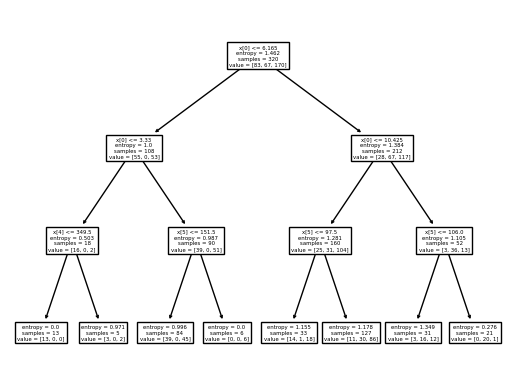

In [32]:
tree.plot_tree(model)

In [33]:
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


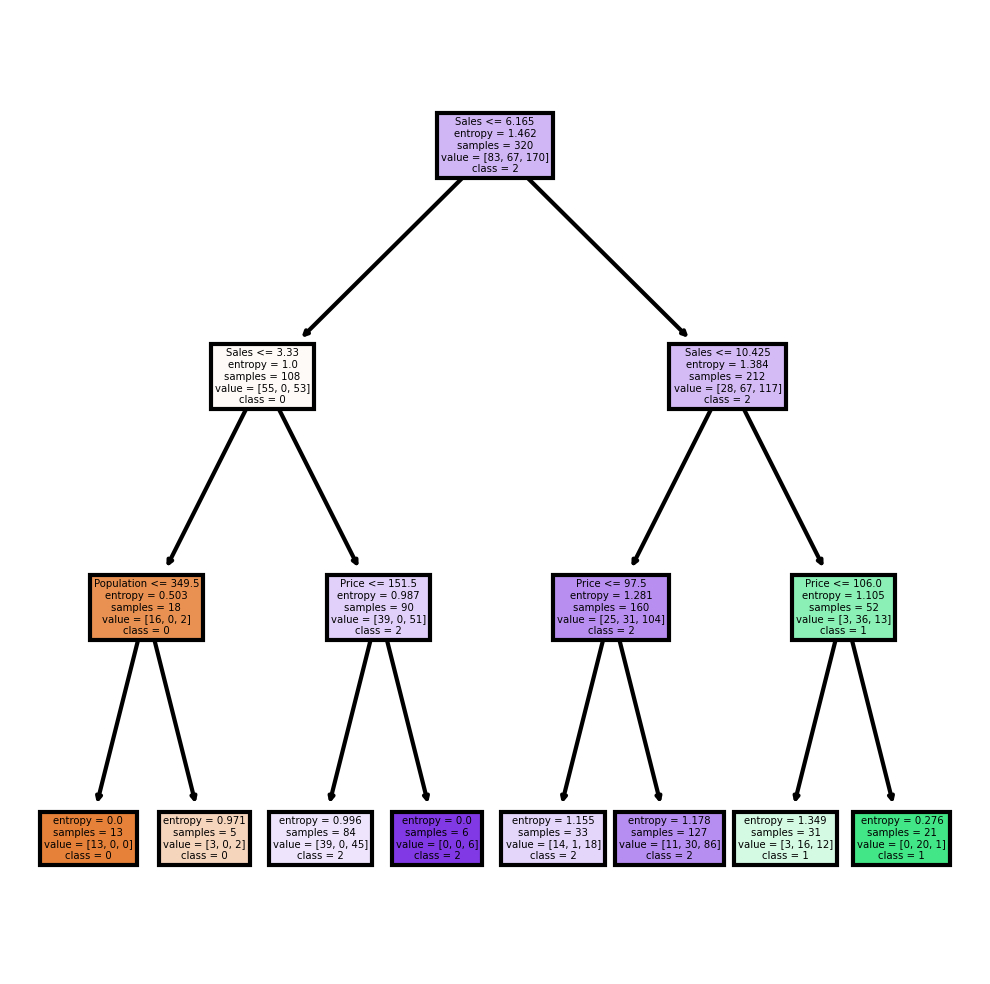

In [34]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['0','1','2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [35]:
pred=model.predict(xtest)

In [40]:
pred

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2], dtype=int64)

In [43]:
pd.crosstab(ytest,pred)

col_0,0,1,2
ShelveLoc,,,
0,1,0,12
1,0,8,10
2,3,5,41


In [44]:
#accuracy
np.mean(ytest==pred)

0.625

# Building Decision Tree Classifier using Gini Criteria

In [45]:
gini_model=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [46]:
gini_model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [47]:
preds=model.predict(xtest)

In [48]:
preds

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2], dtype=int64)

In [49]:
#Accuracy
np.mean(ytest==preds)

0.625